<a href="https://colab.research.google.com/github/AqsaNabi/credit-score-classification/blob/main/mlCredPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# First, let's import the main library we need for handling data
import pandas as pd

# Now, load the dataset into a dataframe
df = pd.read_csv("dataset.csv")

# Just to be sure the data loaded correctly, let's check the shape
print("Shape of dataset:", df.shape)

# Let's peek at the first 5 rows to get an idea of how the data looks
print("\nPreview of dataset:")
print(df.head())

# check column names early on, because sometimes they might not match what we expect
print("\nColumn names:")
print(df.columns.tolist())

# Finally, let's also check if there are any missing values at this stage
print("\nMissing values in each column:")
print(df.isnull().sum())


Shape of dataset: (100000, 28)

Preview of dataset:
     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_D

In [30]:
def clean_data(df):
    """
    Cleans and preprocesses the dataset
    """

    # --- Step 1: Drop unnecessary personal columns ---
    cols_to_drop = ['Name', 'SSN', 'Customer_ID']
    for col in cols_to_drop:
        if col in df.columns:
            df = df.drop(columns=[col])

    # --- Step 2: Handle Credit_History_Age ---
    if "Credit_History_Age" in df.columns:
        def convert_age_to_months(val):
            try:
                years = int(str(val).split()[0])
                months = int(str(val).split()[2])
                return years * 12 + months
            except:
                return None
        df["Credit_History_Age_Months"] = df["Credit_History_Age"].apply(convert_age_to_months)
        df = df.drop(columns=["Credit_History_Age"])

    # --- Step 3: Convert numeric-looking columns into numbers ---
    for col in df.columns:
        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace(",", "").str.replace("k", "000"),
            errors="ignore"
        )


    print("\n📊 Data types after numeric conversion:")
    print(df.dtypes)

    # --- Step 4: Standardize categorical columns (lowercase + strip spaces) ---
    categorical_cols = df.select_dtypes(include="object").columns
    for col in categorical_cols:
        df[col] = df[col].astype(str).str.strip().str.lower()


    print("\n🔎 Sample unique values in categorical columns:")
    for col in categorical_cols[:5]:  # show only first 5 categorical cols
        print(f"{col}: {df[col].unique()[:5]}")

    # --- Step 5: Create new engineered features ---
    if "Outstanding_Debt" in df.columns and "Monthly_Inhand_Salary" in df.columns:
        df["Debt_to_Income"] = df["Outstanding_Debt"] / (df["Monthly_Inhand_Salary"] + 1)

    if "Monthly_Inhand_Salary" in df.columns and "Monthly_Expenses" in df.columns:
        df["Savings_rate"] = (df["Monthly_Inhand_Salary"] - df["Monthly_Expenses"]) / (df["Monthly_Inhand_Salary"] + 1)

    loan_cols = [col for col in df.columns if "loan" in col.lower()]
    if loan_cols:
        df["num_loan_types"] = df[loan_cols].apply(pd.to_numeric, errors="coerce").sum(axis=1)

    # --- Step 6: Handle missing values ---
    for col in df.columns:
        if df[col].dtype != "object":
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

    print("\n✅ Data cleaned successfully!")
    print("Final shape:", df.shape)

    return df


# --- Call the cleaning function ---
df_cleaned = clean_data(df)

# Preview cleaned dataset
df_cleaned.head()


/tmp/ipython-input-2461042048.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(
/tmp/ipython-input-2461042048.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(
/tmp/ipython-input-2461042048.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(
/tmp/ipython-input-2461042048.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(
/tmp/ipython-input-2461042048.py:26: FutureWarning: errors='ignore' is deprecated and will raise in 


📊 Data types after numeric conversion:
ID                             int64
Month                          int64
Age                          float64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts            float64
Num_Credit_Card              float64
Interest_Rate                float64
Num_of_Loan                  float64
Type_of_Loan                  object
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months     object
dtype: object

🔎 Sample unique valu

,ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Debt_to_Income,num_loan_types
0,5634,1,23.0,scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,26.822620,no,49.574949,21.46538,high_spent_small_value_payments,312.494089,good,none,0.44362,4.0
1,5635,2,23.0,scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,31.944960,no,49.574949,21.46538,low_spent_large_value_payments,284.629162,good,none,0.44362,4.0
2,5636,3,23.0,scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,28.609352,no,49.574949,21.46538,low_spent_medium_value_payments,331.209863,good,none,0.44362,4.0
3,5637,4,23.0,scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,31.377862,no,49.574949,21.46538,low_spent_small_value_payments,223.451310,good,none,0.44362,4.0
4,5638,5,23.0,scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,24.797347,no,49.574949,21.46538,high_spent_medium_value_payments,341.489231,good,none,0.44362,4.0



🔎 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  int64  
 1   Month                      100000 non-null  int64  
 2   Age                        100000 non-null  float64
 3   Occupation                 100000 non-null  object 
 4   Annual_Income              100000 non-null  float64
 5   Monthly_Inhand_Salary      100000 non-null  float64
 6   Num_Bank_Accounts          100000 non-null  float64
 7   Num_Credit_Card            100000 non-null  float64
 8   Interest_Rate              100000 non-null  float64
 9   Num_of_Loan                100000 non-null  float64
 10  Type_of_Loan               100000 non-null  object 
 11  Delay_from_due_date        100000 non-null  float64
 12  Num_of_Delayed_Payment     100000 non-null  float64
 13  Changed_Credit_

/tmp/ipython-input-3341072949.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_Score", data=df, palette="viridis")


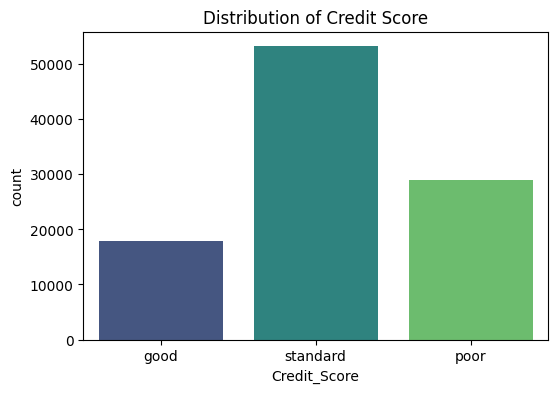

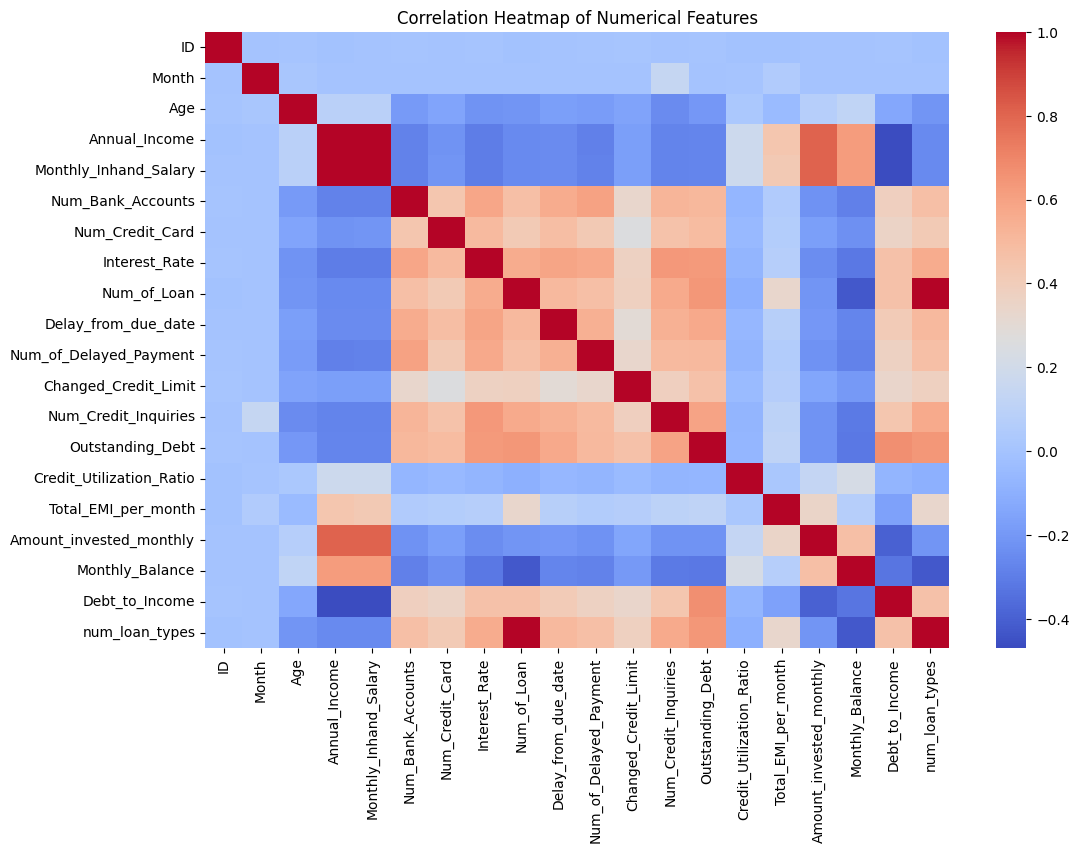

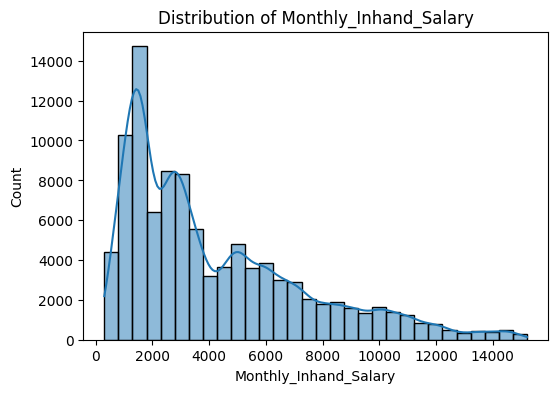

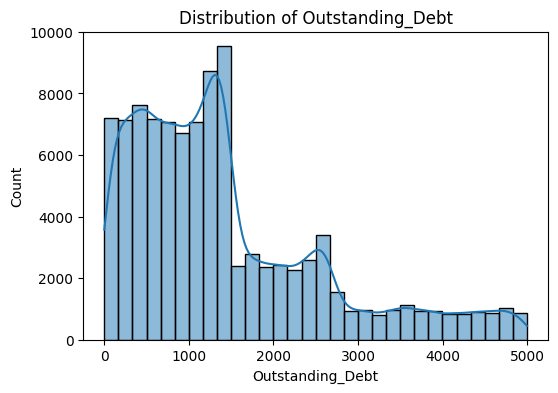

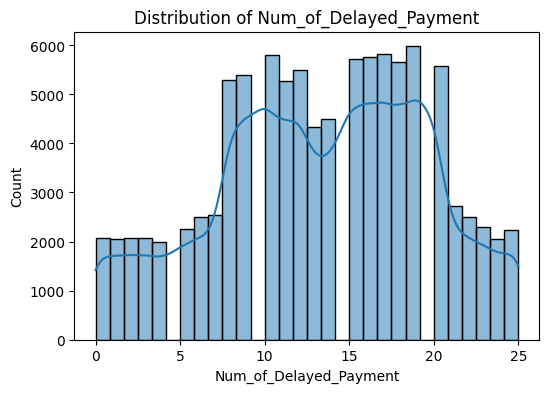


✅ EDA Completed!


In [32]:
# ==============================
# 📌 Phase 3: Exploratory Data Analysis (EDA)
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

def eda_summary(df):
    """
    Function to perform some quick exploratory data analysis
    """

    # --- Step 1: General info about the dataset ---
    print("\n🔎 Basic Info:")
    print(df.info())

    print("\n📊 Statistical Summary (numerical features):")
    print(df.describe())

    # --- Step 2: Distribution of the target variable ---
    if "Credit_Score" in df.columns:
        print("\n🎯 Target distribution (Credit_Score):")
        print(df["Credit_Score"].value_counts())

        plt.figure(figsize=(6,4))
        sns.countplot(x="Credit_Score", data=df, palette="viridis")
        plt.title("Distribution of Credit Score")
        plt.show()

    # --- Step 3: Correlation Heatmap (numerical features only) ---
    plt.figure(figsize=(12,8))
    numeric_df = df.select_dtypes(include=["int64", "float64"])
    sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()

    # --- Step 4: Check distributions of a few important features ---
    important_cols = ["Monthly_Inhand_Salary", "Outstanding_Debt", "Num_of_Delayed_Payment"]
    for col in important_cols:
        if col in df.columns:
            plt.figure(figsize=(6,4))
            sns.histplot(df[col], bins=30, kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()

    print("\n✅ EDA Completed!")


# --- Run EDA on cleaned data ---
eda_summary(df_cleaned)


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- Step 0: Identify categorical & numerical columns ---
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

print("Categorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

# --- Step 1: Preprocessor (encode categorical, keep numerical as is) ---
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

# --- Step 2: Wrap each model inside a Pipeline ---
pipelines = {
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor),
        ("model", DecisionTreeClassifier(random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),
        ("model", RandomForestClassifier(random_state=42))
    ]),
    "Gradient Boosting": Pipeline([
        ("preprocessor", preprocessor),
        ("model", GradientBoostingClassifier(random_state=42))
    ]),
    "KNN": Pipeline([
        ("preprocessor", preprocessor),
        ("model", KNeighborsClassifier())
    ])
}


Categorical columns: ['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_History_Age_Months']
Numerical columns: ['ID', 'Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Debt_to_Income', 'num_loan_types']
